<a href="https://colab.research.google.com/github/BIGBOSS-FOX/CS-513-Final-Project-Job-Termination-Classification/blob/master/ANN_Final_Project_Daoyuan_Chen_%26_Haopeng_Hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the "attrition_data.csv"



In [1]:
import pandas as pd

data = pd.read_csv("attrition_data.csv")

data

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,TERMINATION_YEAR,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5
0,3285941608,33615,22,71850,BLACK,F,Divorced,4,35,3+,Client Referral,June,False,2008.0,N,N,4,N,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0
1,3687079832,70675,40,59806,ASIAN,M,Single,3,18,3+,Executive Referral,June,False,NaN,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
2,7209970080,34320,23,60311,WHITE,F,Single,5,18,2,Former Employee/Intern,February,False,NaN,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
3,9084013977,103199,59,16233,ASIAN,F,Single,2,50,0,Direct Sourcing,October,True,2005.0,N,Y,2,N,N,LEVEL 1,T,Finance,0,0,0,0,0
4,4566148978,141801,71,64415,ASIAN,F,Single,4,34,3,Inroads,May,False,NaN,N,N,4,N,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,8595959073,34636,23,58258,ASIAN,F,Single,1,43,0,Staffing Agency,July,False,NaN,N,N,1,N,Y,LEVEL 1,A,Physical Flows,0,0,0,0,0
9608,4606362550,34962,27,58258,WHITE,F,Single,5,28,2,NaN,November,False,NaN,N,N,1,N,N,LEVEL 3,A,Physical Flows,0,0,0,0,0
9609,5856364670,39286,27,36545,WHITE,F,Single,3,31,2,Executive Referral,February,False,NaN,N,N,1,N,N,LEVEL 3,A,Production & Operations,0,0,0,0,0
9610,5388746486,39145,27,44203,WHITE,M,Married,4,32,3+,Open House,February,False,NaN,N,N,4,N,N,LEVEL 2,A,Production & Operations,0,0,0,0,0


# Summary data

In [2]:
data.describe(include='all')

,EMP_ID,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,TERMINATION_YEAR,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5
count,9.612000e+03,9.612000e+03,9612.000000,9612.000000,9612,9612,9612,9612.000000,9612.000000,9612,9167,9612,9612,4218.000000,9612,9612,9612.000000,9612,9612,9612,9612,9612,9612.000000,9612.000000,9612.000000,9612.000000,9612.000000
unique,NaN,NaN,NaN,NaN,8,2,3,NaN,NaN,5,19,12,2,NaN,2,2,NaN,2,2,5,2,66,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,WHITE,F,Married,NaN,NaN,0,Job Boards/Online Advertising,May,False,NaN,N,N,NaN,N,N,LEVEL 1,A,Production & Operations,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,5820,5723,4027,NaN,NaN,2423,513,846,8726,NaN,9018,7781,NaN,8665,8682,3398,5394,1714,NaN,NaN,NaN,NaN,NaN
mean,5.168687e+09,8.938563e+04,49.953808,51485.811174,NaN,NaN,NaN,2.757491,40.151581,NaN,NaN,NaN,NaN,2011.013514,NaN,NaN,3.002081,NaN,NaN,NaN,NaN,NaN,1.346026,1.022264,0.775593,0.617561,0.466188
std,2.394707e+09,5.843344e+04,28.148113,22853.906872,NaN,NaN,NaN,1.411257,13.664378,NaN,NaN,NaN,NaN,3.915888,NaN,NaN,1.406909,NaN,NaN,NaN,NaN,NaN,1.325699,1.286348,1.190036,1.102402,0.971020
min,1.000475e+09,1.678600e+04,14.000000,10006.000000,NaN,NaN,NaN,1.000000,18.000000,NaN,NaN,NaN,NaN,2004.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.092187e+09,5.085550e+04,32.000000,33534.000000,NaN,NaN,NaN,2.000000,28.000000,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.213208e+09,7.421050e+04,43.000000,52981.000000,NaN,NaN,NaN,3.000000,39.000000,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000
75%,7.249635e+09,1.088115e+05,59.000000,69401.000000,NaN,NaN,NaN,4.000000,52.000000,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,1.000000,0.000000


In [3]:
data.dtypes

EMP_ID                      int64
ANNUAL_RATE                 int64
HRLY_RATE                   int64
JOBCODE                     int64
ETHNICITY                  object
SEX                        object
MARITAL_STATUS             object
JOB_SATISFACTION            int64
AGE                         int64
NUMBER_OF_TEAM_CHANGED     object
REFERRAL_SOURCE            object
HIRE_MONTH                 object
REHIRE                       bool
TERMINATION_YEAR          float64
IS_FIRST_JOB               object
TRAVELLED_REQUIRED         object
PERFORMANCE_RATING          int64
DISABLED_EMP               object
DISABLED_VET               object
EDUCATION_LEVEL            object
STATUS                     object
JOB_GROUP                  object
PREVYR_1                    int64
PREVYR_2                    int64
PREVYR_3                    int64
PREVYR_4                    int64
PREVYR_5                    int64
dtype: object

# Drop "EMP_ID" and "TERMINATION_YEAR"

In [4]:
data.drop(["EMP_ID", "TERMINATION_YEAR"], axis=1, inplace=True)

data

,ANNUAL_RATE,HRLY_RATE,JOBCODE,ETHNICITY,SEX,MARITAL_STATUS,JOB_SATISFACTION,AGE,NUMBER_OF_TEAM_CHANGED,REFERRAL_SOURCE,HIRE_MONTH,REHIRE,IS_FIRST_JOB,TRAVELLED_REQUIRED,PERFORMANCE_RATING,DISABLED_EMP,DISABLED_VET,EDUCATION_LEVEL,STATUS,JOB_GROUP,PREVYR_1,PREVYR_2,PREVYR_3,PREVYR_4,PREVYR_5
0,33615,22,71850,BLACK,F,Divorced,4,35,3+,Client Referral,June,False,N,N,4,N,N,LEVEL 2,T,Plant & Facilities Maintenance,0,0,0,0,0
1,70675,40,59806,ASIAN,M,Single,3,18,3+,Executive Referral,June,False,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
2,34320,23,60311,WHITE,F,Single,5,18,2,Former Employee/Intern,February,False,Y,N,3,N,N,LEVEL 1,A,Customer Care,3,3,3,2,3
3,103199,59,16233,ASIAN,F,Single,2,50,0,Direct Sourcing,October,True,N,Y,2,N,N,LEVEL 1,T,Finance,0,0,0,0,0
4,141801,71,64415,ASIAN,F,Single,4,34,3,Inroads,May,False,N,N,4,N,N,LEVEL 1,A,Marketing - Direct,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,34636,23,58258,ASIAN,F,Single,1,43,0,Staffing Agency,July,False,N,N,1,N,Y,LEVEL 1,A,Physical Flows,0,0,0,0,0
9608,34962,27,58258,WHITE,F,Single,5,28,2,NaN,November,False,N,N,1,N,N,LEVEL 3,A,Physical Flows,0,0,0,0,0
9609,39286,27,36545,WHITE,F,Single,3,31,2,Executive Referral,February,False,N,N,1,N,N,LEVEL 3,A,Production & Operations,0,0,0,0,0
9610,39145,27,44203,WHITE,M,Married,4,32,3+,Open House,February,False,N,N,4,N,N,LEVEL 2,A,Production & Operations,0,0,0,0,0


# Replace all " " with a random ethnicity in "ETHNICITY"

In [5]:
pd.unique(data['ETHNICITY'])

array(['BLACK', 'ASIAN', 'WHITE', 'HISPA', 'PACIF', 'TWO', 'AMIND', ' '],
      dtype=object)

In [6]:
import random
random_ethnicity = random.choice(data[data['ETHNICITY'] != " "]['ETHNICITY'])
random_ethnicity

'WHITE'

In [7]:
index_list = data.index[data['ETHNICITY'] == " "].tolist()
index_list

[2934]

In [0]:
data['ETHNICITY'].replace(" ", random_ethnicity, inplace = True)

In [9]:
data['ETHNICITY'][index_list[0]]

'WHITE'

In [10]:
pd.unique(data['ETHNICITY'])

array(['BLACK', 'ASIAN', 'WHITE', 'HISPA', 'PACIF', 'TWO', 'AMIND'],
      dtype=object)

In [11]:
data['ETHNICITY'].describe(include='all')

count      9612
unique        7
top       WHITE
freq       5821
Name: ETHNICITY, dtype: object

# Replace all " " with "Unknown" in "REFERRAL_SOURCE"

In [12]:
pd.unique(data['REFERRAL_SOURCE'])

array(['Client Referral', 'Executive Referral', 'Former Employee/Intern',
       'Direct Sourcing', 'Inroads', 'Unknown', nan, 'Job Fair',
       'Print Advertisement', 'Corporate Career Site', 'Agency',
       'College Recommendation', 'Job Posting',
       'Job Boards/Online Advertising', 'Open House',
       'College Recruiting(UnderGrad)', 'E-Strat', 'Unsolicited',
       'Staffing Agency', 'Other Source'], dtype=object)

In [0]:
data['REFERRAL_SOURCE'].fillna('Unknown', inplace=True)

In [14]:
pd.unique(data['REFERRAL_SOURCE'])

array(['Client Referral', 'Executive Referral', 'Former Employee/Intern',
       'Direct Sourcing', 'Inroads', 'Unknown', 'Job Fair',
       'Print Advertisement', 'Corporate Career Site', 'Agency',
       'College Recommendation', 'Job Posting',
       'Job Boards/Online Advertising', 'Open House',
       'College Recruiting(UnderGrad)', 'E-Strat', 'Unsolicited',
       'Staffing Agency', 'Other Source'], dtype=object)

In [15]:
data['REFERRAL_SOURCE'].describe(include='all')

count        9612
unique         19
top       Unknown
freq          917
Name: REFERRAL_SOURCE, dtype: object

In [16]:
data['REFERRAL_SOURCE']

0              Client Referral
1           Executive Referral
2       Former Employee/Intern
3              Direct Sourcing
4                      Inroads
                 ...          
9607           Staffing Agency
9608                   Unknown
9609        Executive Referral
9610                Open House
9611               Job Posting
Name: REFERRAL_SOURCE, Length: 9612, dtype: object

# Perform min-max scaling each numerical feature column to the range [0,1]

In [17]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
num = ['ANNUAL_RATE', 'HRLY_RATE', 'JOB_SATISFACTION', 'AGE', 'PERFORMANCE_RATING', 'PREVYR_1', 'PREVYR_2', 'PREVYR_3', 'PREVYR_4', 'PREVYR_5']
dataset_num = data[num].values
mms.fit(dataset_num)
dataset_num_norm = mms.transform(dataset_num)
dataset_num_norm

array([[0.01363624, 0.01346801, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.0436653 , 0.04377104, 0.5       , ..., 0.6       , 0.4       ,
        0.6       ],
       [0.01420749, 0.01515152, 1.        , ..., 0.6       , 0.4       ,
        0.6       ],
       ...,
       [0.01823135, 0.02188552, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.0181171 , 0.02188552, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.05991226, 0.06060606, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Perform one-hot encoding on each categorical feature column

In [18]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
cat = ['JOBCODE', 'ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'REFERRAL_SOURCE', 'HIRE_MONTH', 'REHIRE', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'EDUCATION_LEVEL', 'JOB_GROUP']
dataset_cat = data[cat].values
# format all fields as string
dataset_cat = dataset_cat.astype(str)
ohe.fit(dataset_cat)
dataset_cat_enc = ohe.transform(dataset_cat).todense()
dataset_cat_enc

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Perform one-hot encoding on label column

In [19]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
dataset_label = data['STATUS'].values
lb.fit(dataset_label)
dataset_label_enc = lb.transform(dataset_label)
dataset_label_enc


array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

# Concatenate normalized numerical features and one-hot encoded categorical features into `X` and denote label by `y`

In [20]:
import numpy as np

X = np.hstack([dataset_num_norm, dataset_cat_enc])
y = dataset_label_enc
X.shape, y.shape

((9612, 1457), (9612, 1))

# Use 30% test 70% training data

In [21]:
from sklearn.model_selection import train_test_split

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6728, 1457), (2884, 1457), (6728, 1), (2884, 1))

## Use Keras to train a neural network with one 5-node hidden layer and a 1-node sigmoid output layer

In [22]:
from keras.models import Sequential
from keras.layers import Dense

# define the  model
model = Sequential()
model.add(Dense(5, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# print the summary of the model.
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 7290      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 7,296
Trainable params: 7,296
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
6728/6728 [==============================] - 1s 131us/step - loss: 0.6401 - accuracy: 0.6546
Epoch 2/100
6728/6728 [==============================] - 1s 87us/step - loss: 0.5489 - accuracy: 0.7452
Epoch 3/100
6728/6728 [==============================] - 1s 88us/step - loss: 0.5021 - accuracy: 0.7711
Epoch 4/100
6728/6728 [==============================] - 1s 88us/step - loss: 0.4739 - accuracy: 0.7781
Epoch 5/100
6728/6728 [==============================] - 1s 89us/step - loss: 0.4541 - accuracy: 0.7872
Epoch 6/100
6728/6728 [==============================] - 1s 87us/step - loss: 0.4409 - accuracy: 0.7882
Epoch 7/100
6728/6728 [==============================] - 1s 87us/step - loss: 0.4308 - accuracy: 0.7922
Epoch 8/100
6728/6728 [==============================] - 1s 87us/step - loss: 0.4220 - accuracy: 0.7988
Epoch 9/100
6728/6728 [==============================] - 1s 92us/step - loss: 0.4133 - accuracy: 0.8013
Epoch 10/100
6728/6728 [==============================] - 1s 89

# Evaluate the accuracy of the prediction

In [25]:
# model accuracy on test data
_, accuracy = model.evaluate(X_test, y_test)
print('accuracy = ' + str(accuracy))

2884/2884 [==============================] - 0s 34us/step
accuracy = 0.7392510175704956


In [26]:
# prediction from the keras neural network model
y_pred = model.predict_classes(X_test)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]], dtype=int32)

In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1310,  314],
       [ 438,  822]])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(69.0, 0.5, 'y_test')

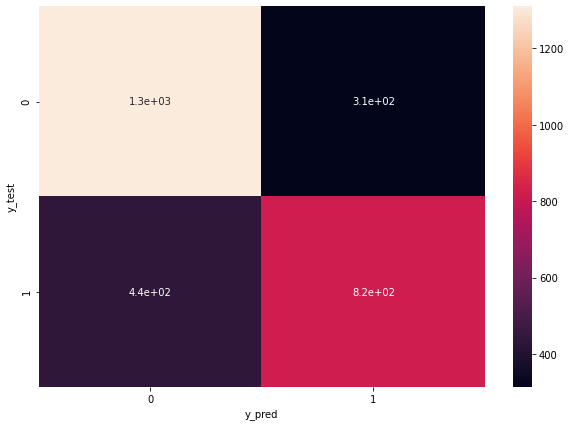

In [28]:
# plot the confusion matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')